Neural networks can be a difficult concept to understand. We think it’s mainly because they can be used for so many different things like classification, identification or just regression.

### What is Time Series Forecasting?

Time series forecasting is a technique for predicting events through a time sequence. The technique is used in many fields of study, from geology to behaviour to economics. Techniques predict future events by analyzing trends from the past, assuming that future trends will hold similar to historical trends.

### What is LSTM?
LSTM stands for Short Term Long Term Memory. It is a model or an architecture that extends the memory of recurrent neural networks. Typically, recurrent neural networks have **short-term memory** in that they use persistent past information for use in the current neural network. Essentially, the previous information is used in the current task. This means that we do not have a list of all of the previous information available for the neural node.

In [2]:
import numpy
import matplotlib.pyplot as plt
import pandas
import math
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [3]:
# fix random seed for reproducibility
numpy.random.seed(7)

In [4]:
# load the dataset
dataframe = pandas.read_csv('airline-passengers.csv', usecols=[1], engine='python')

In [5]:
dataset = dataframe.values
dataset = dataset.astype('float32')

In [6]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [7]:
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size

train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

In [8]:
print(len(train), len(test))

96 48


Before training the data on the LSTM model, we need to prepare the data so that we can fit it on the model, for this task we will define a helper function:

In [9]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return numpy.array(dataX), numpy.array(dataY)

Now, we need to reshape the data before applying it into the LSTM model:

In [10]:
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [11]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


In [12]:
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

Instructions for updating:
Use tf.cast instead.
Epoch 1/100
 - 7s - loss: 0.0368
Epoch 2/100
 - 0s - loss: 0.0169
Epoch 3/100
 - 0s - loss: 0.0134
Epoch 4/100
 - 0s - loss: 0.0124
Epoch 5/100
 - 0s - loss: 0.0115
Epoch 6/100
 - 0s - loss: 0.0106
Epoch 7/100
 - 0s - loss: 0.0095
Epoch 8/100
 - 0s - loss: 0.0083
Epoch 9/100
 - 0s - loss: 0.0071
Epoch 10/100
 - 0s - loss: 0.0060
Epoch 11/100
 - 0s - loss: 0.0050
Epoch 12/100
 - 0s - loss: 0.0040
Epoch 13/100
 - 0s - loss: 0.0034
Epoch 14/100
 - 1s - loss: 0.0028
Epoch 15/100
 - 0s - loss: 0.0025
Epoch 16/100
 - 0s - loss: 0.0022
Epoch 17/100
 - 0s - loss: 0.0021
Epoch 18/100
 - 0s - loss: 0.0021
Epoch 19/100
 - 0s - loss: 0.0020
Epoch 20/100
 - 0s - loss: 0.0021
Epoch 21/100
 - 0s - loss: 0.0020
Epoch 22/100
 - 0s - loss: 0.0020
Epoch 23/100
 - 0s - loss: 0.0020
Epoch 24/100
 - 0s - loss: 0.0020
Epoch 25/100
 - 0s - loss: 0.0020
Epoch 26/100
 - 0s - loss: 0.0020
Epoch 27/100
 - 0s - loss: 0.0020
Epoch 28/100
 - 0s - loss: 0.0020
Epoch 29/

In [13]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

In [14]:
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

In [15]:
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))

In [16]:
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

In [17]:
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

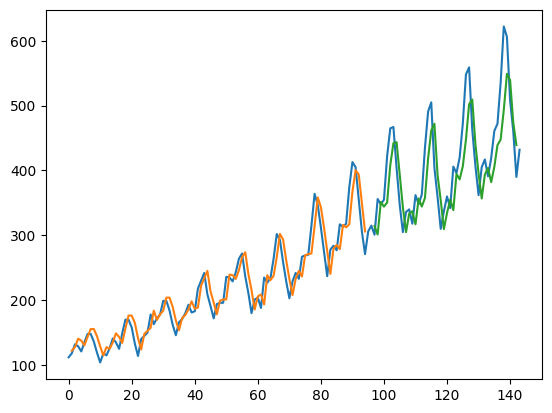

In [18]:
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()